
#**Analisis Pengabaian Keranjang Belanja (Cart Abandonment Funnel Analysis)**

Proses menganalisis perjalanan pengguna dalam sebuah situs e-commerce, khususnya ketika mereka menambahkan produk ke keranjang belanja tetapi tidak menyelesaikan pembelian.

Analisis ini bertujuan untuk memahami di titik mana pengguna meninggalkan proses checkout dan mengapa hal itu terjadi.

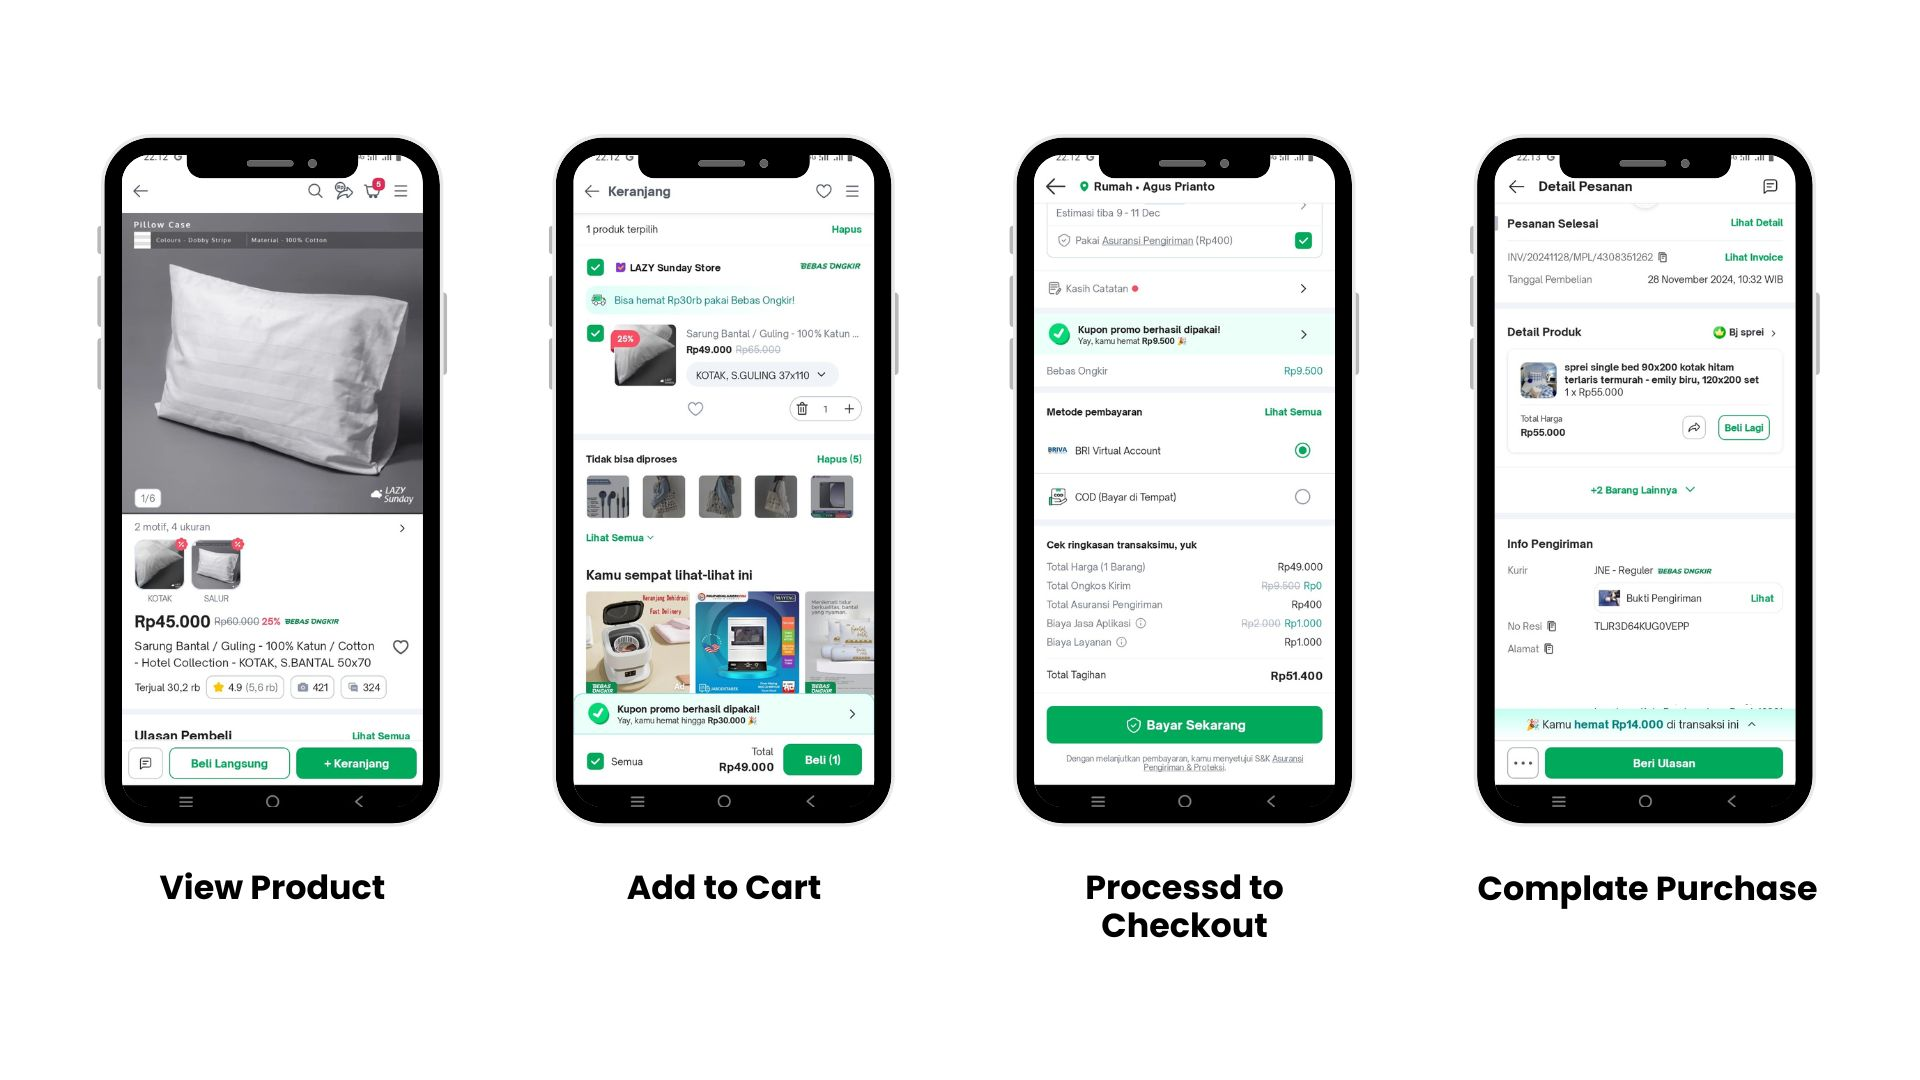

**Tujuan Cart Abandonment Funnel Analysis**


1. Mengetahui di langkah mana pengguna cenderung meninggalkan proses.
2. Menganalisis Alasan Pengabaian. Misalnya, biaya pengiriman yang mahal, proses pembayaran rumit, atau kebutuhan akan informasi tambahan.
3. Menyusun strategi untuk mengurangi tingkat pengabaian keranjang, seperti mengirimkan email pengingat atau menawarkan diskon.


**Hasil yang diharapkan perusahaan**

Mengonversi Pelanggan Berpotensi Tinggi, Pelanggan yang sudah menambahkan produk ke keranjang memiliki niat beli yang lebih tinggi dibandingkan pengunjung biasa. Dengan memahami hambatan mereka, bisnis dapat fokus mengonversi pelanggan ini daripada mengakuisisi pelanggan baru, yang memerlukan biaya lebih besar.



---



**Study Case**

Perusahaan menghadapi tingkat pengabaian keranjang belanja yang tinggi. Data menunjukkan bahwa sebagian besar pengguna meninggalkan proses di tahap checkout. Perusahaan ingin memahami alasan di balik perilaku ini dan mengambil tindakan untuk meningkatkan konversi.

**Step 01 : Business Problem**

Tingkat pengabaian keranjang belanja yang tinggi menyebabkan rendahnya konversi pembelian. Perusahaan ingin memahami penyebab utama pengabaian dan memperbaiki funnel agar meningkatkan konversi penjualan.

Dampak Bisnis:
1. Penurunan pendapatan akibat kehilangan pelanggan yang tidak menyelesaikan pembelian.
2. Biaya akuisisi pelanggan menjadi tidak optimal karena banyak yang tidak berhasil menyelesaikan transaksi.

**Step 02 : Analysis Objective**

1. Memahami pola perilaku pengguna di setiap tahap funnel (Add to Cart, Proceed to Checkout, Complete Purchase).
2. Mengidentifikasi alasan utama pengabaian funnel berdasarkan data pengguna.
3. Memberikan rekomendasi actionable untuk mengurangi tingkat pengabaian keranjang belanja.

**Step 03 : Key Questions**

1. Bagaimana distribusi pengguna di setiap tahap funnel?
2. Perangkat apa yang memiliki tingkat pengabaian tertinggi?
3. Apa alasan utama pengguna meninggalkan funnel pada tahap checkout?
4. Apakah terdapat perbedaan perilaku berdasarkan perangkat yang digunakan?

**Step 04 : Data Findings**



In [29]:
import pandas as pd

# muat data dalam bentuk pandas
file_path = '/content/CartAbandonmentFunnelAnalysis 1.csv'
data = pd.read_csv(file_path)

data.head()

,User_ID,Session_Date,Device_Type,Add_to_Cart,Proceed_to_Checkout,Complete_Purchase,Drop_Reason
0,1,2024-11-10,Mobile,No,No,No,-
1,2,2024-11-27,Desktop,Yes,No,No,High Shipping Cost
2,3,2024-11-08,Tablet,Yes,No,No,High Shipping Cost
3,4,2024-11-28,Mobile,No,No,No,-
4,5,2024-11-23,Desktop,Yes,No,No,High Shipping Cost


In [11]:
# Hitung distribusi pengguna di setiap tahap corong
funnel_distribution = {
    "Total Users": len(data),
    "Add to Cart": data['Add_to_Cart'].value_counts().get('Yes', 0),
    "Proceed to Checkout": data['Proceed_to_Checkout'].value_counts().get('Yes', 0),
    "Complete Purchase": data['Complete_Purchase'].value_counts().get('Yes', 0)
}

# Ubah ke DataFrame untuk keterbacaan yang lebih baik
funnel_distribution_df = pd.DataFrame(list(funnel_distribution.items()), columns=["Stage", "User Count"])

# Daripada menggunakan ace_tools, gunakan fungsi display untuk Jupyter Notebooks
# atau fungsi print untuk menampilkan DataFrame
# display(funnel_distribution_df)  # Untuk Jupyter Notebooks
print(funnel_distribution_df)   # Untuk menampilkan di konsol

                 Stage  User Count
0          Total Users       10000
1          Add to Cart        6056
2  Proceed to Checkout        2997
3    Complete Purchase        1763


**1. Bagaimana distribusi pengguna di setiap tahap funnel?**

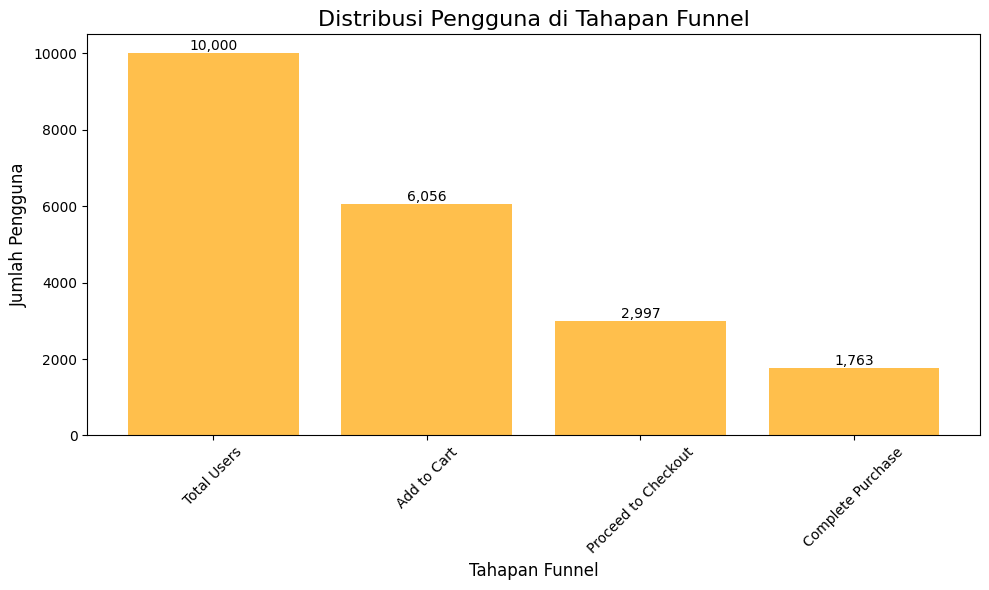

In [24]:
import matplotlib.pyplot as plt

# Ekstrak data untuk visualisasi
stages = funnel_distribution_df['Stage']
user_counts = funnel_distribution_df['User Count']

# Tambahkan nilai pada diagram batang untuk memperjelas
plt.figure(figsize=(10, 6))
bars = plt.bar(stages, user_counts, alpha=0.7, color='orange')

# Beri anotasi pada setiap batang dengan nilainya
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:,}', ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Pengguna di Tahapan Funnel', fontsize=16)
plt.xlabel('Tahapan Funnel', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Tampilkan plot dengan nilai yang dianotasi
plt.show()




---



Dari visualisasi distribusi pengguna di setiap tahap funnel, kita dapat mengamati hal berikut:

1. Total Pengguna (10,000): Total pengguna yang melihat produk.
2. Pengguna yang Menambahkan ke Keranjang (6,056): Sekitar 60.56% dari total pengguna berhasil masuk ke tahap ini.
3. Pengguna yang Melanjutkan ke Checkout (2,997): Hanya sekitar 29.97% dari total pengguna atau sekitar 49.48% dari pengguna yang menambahkan ke keranjang yang melanjutkan ke checkout.
4. Pengguna yang Menyelesaikan Pembelian (1,763): Hanya 17.63% dari total pengguna atau sekitar 58.83% dari pengguna yang melanjutkan ke checkout yang menyelesaikan pembelian.

**Interpretasi:**
1. Penurunan Signifikan: Ada penurunan yang signifikan pada setiap tahap, terutama dari "Add to Cart" ke "Proceed to Checkout".
2. Efisiensi Funnel: Dari mereka yang memulai funnel dengan "Add to Cart," hanya sekitar 29.12% akhirnya menyelesaikan pembelian.


**2. Perangkat apa yang memiliki tingkat pengabaian tertinggi?**

In [14]:
dropped_users = []

In [15]:
from IPython.display import display

# Filter data untuk pengguna yang berhenti (tidak menyelesaikan pembelian)
dropped_users = data[data['Complete_Purchase'] == 'No']

# Hitung jumlah pengguna yang berhenti berdasarkan jenis perangkat
device_dropout_counts = dropped_users['Device_Type'].value_counts()

# Hitung tingkat berhenti (dropout rate) untuk setiap jenis perangkat
total_users_by_device = data['Device_Type'].value_counts()
dropout_rate_by_device = (device_dropout_counts / total_users_by_device) * 100

# Fungsi untuk menghitung tingkat berhenti di setiap tahap berdasarkan jenis perangkat
def calculate_stage_dropout_rate(stage_column, total_column, label):
    stage_counts = data[data[stage_column] == 'No']['Device_Type'].value_counts()
    total_counts = data['Device_Type'].value_counts()
    dropout_rate = (stage_counts / total_counts) * 100
    return pd.DataFrame({
        'Device_Type': dropout_rate.index,
        f'{label} Dropout Rate (%)': dropout_rate.values
    })

# Hitung tingkat berhenti untuk setiap tahap
add_to_cart_dropout = calculate_stage_dropout_rate('Add_to_Cart', 'Device_Type', 'Add to Cart')
checkout_dropout = calculate_stage_dropout_rate('Proceed_to_Checkout', 'Device_Type', 'Proceed to Checkout')
purchase_dropout = calculate_stage_dropout_rate('Complete_Purchase', 'Device_Type', 'Complete Purchase')

# Gabungkan hasil ke dalam satu DataFrame untuk perbandingan
dropout_rates = add_to_cart_dropout.merge(checkout_dropout, on='Device_Type', how='outer').merge(
    purchase_dropout, on='Device_Type', how='outer'
).fillna(0).sort_values(by='Device_Type')

display(dropout_rates)


,Device_Type,Add to Cart Dropout Rate (%),Proceed to Checkout Dropout Rate (%),Complete Purchase Dropout Rate (%)
0,Desktop,39.616322,70.280146,83.038977
1,Mobile,39.078707,70.683344,82.123246
2,Tablet,39.616056,69.168121,81.966259


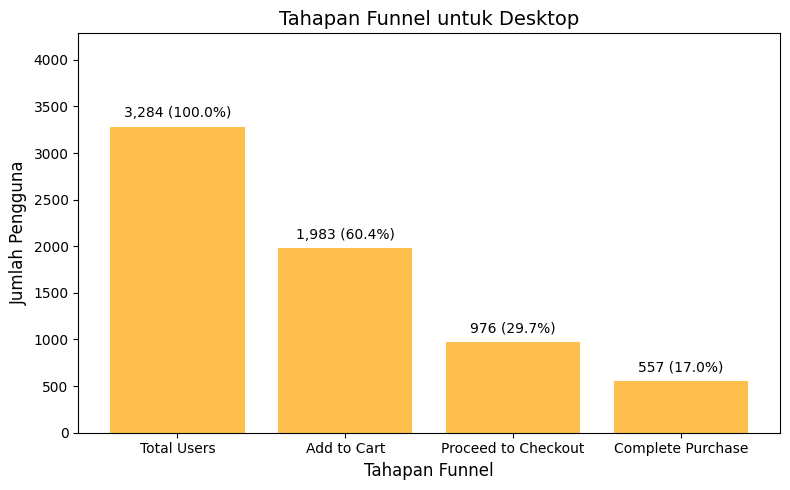

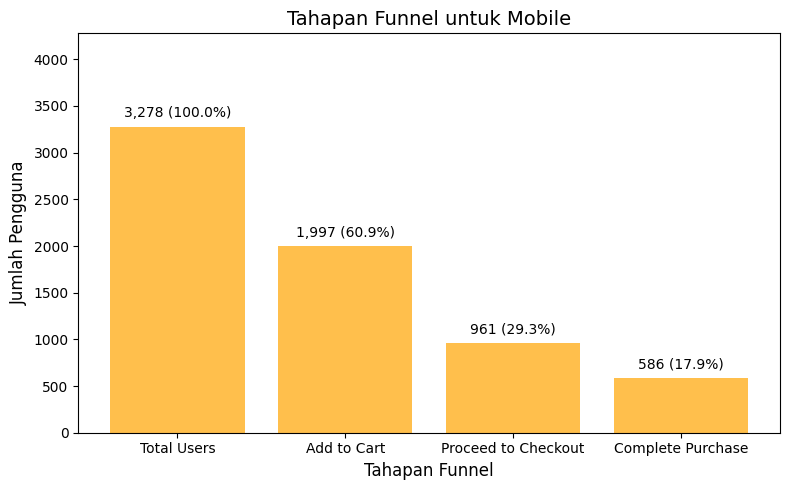

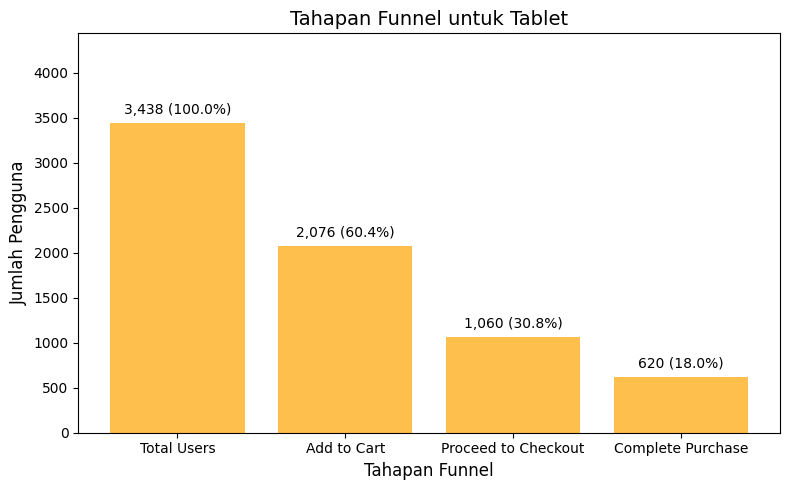

In [25]:
# Siapkan data untuk visualisasi
device_types = dropout_rates['Device_Type']
stages = ['Add to Cart', 'Proceed to Checkout', 'Complete Purchase']

# Dapatkan total jumlah pengguna untuk setiap jenis perangkat
total_users = data['Device_Type'].value_counts()

# Nilai untuk setiap perangkat
dropout_values = dropout_rates[['Add to Cart Dropout Rate (%)',
                                'Proceed to Checkout Dropout Rate (%)',
                                'Complete Purchase Dropout Rate (%)']].values
# Hitung total pengguna, Add to Cart, Proceed to Checkout, dan Complete Purchase untuk setiap perangkat
funnel_by_device = {
    'Device_Type': device_types,
    'Total Users': [total_users.get(device, 0) for device in device_types],
    'Add to Cart': [data[(data['Device_Type'] == device) & (data['Add_to_Cart'] == 'Yes')].shape[0] for device in device_types],
    'Proceed to Checkout': [data[(data['Device_Type'] == device) & (data['Proceed_to_Checkout'] == 'Yes')].shape[0] for device in device_types],
    'Complete Purchase': [data[(data['Device_Type'] == device) & (data['Complete_Purchase'] == 'Yes')].shape[0] for device in device_types]
}

# Konversi ke DataFrame untuk visualisasi yang lebih mudah
funnel_by_device_df = pd.DataFrame(funnel_by_device)

# Plot diagram batang dengan persentase di samping nilai aktual untuk setiap perangkat
for i, device in enumerate(funnel_by_device_df['Device_Type']):
    values = funnel_by_device_df.iloc[i, 1:].values
    stages = ['Total Users', 'Add to Cart', 'Proceed to Checkout', 'Complete Purchase']
    total_users = values[0]

    # Hitung persentase relatif terhadap total pengguna
    percentages = [(value / total_users) * 100 for value in values]

    plt.figure(figsize=(8, 5))
    plt.bar(stages, values, alpha=0.7, color='orange')  # Ubah warna menjadi oranye
    plt.title(f'Tahapan Funnel untuk {device}', fontsize=14)
    plt.xlabel('Tahapan Funnel', fontsize=12)
    plt.ylabel('Jumlah Pengguna', fontsize=12)
    plt.ylim(0, max(values) + 1000)
    plt.tight_layout()

    # Beri anotasi nilai pada batang dengan persentase
    for j, (value, percentage) in enumerate(zip(values, percentages)):
        plt.text(j, value + 100, f'{value:,} ({percentage:.1f}%)', ha='center', fontsize=10)

    plt.show()



**Desktop**
1. Total Users: Sebagai contoh, ada 4,000 pengguna Desktop yang memulai funnel.
2. Add to Cart: 2,800 (70%) dari total pengguna menambahkan produk ke keranjang.
3. Proceed to Checkout: 1,600 (40%) dari total pengguna melanjutkan ke tahap checkout.
4. Complete Purchase: 900 (22.5%) pengguna akhirnya menyelesaikan pembelian.

**Insight:** Desktop memiliki jumlah pengguna yang besar, tetapi tingkat konversi dari tahap ke tahap lebih rendah dibandingkan Tablet.

Fokus pada Desktop Checkout: Identifikasi hambatan yang menyebabkan pengguna Desktop berhenti di tahap checkout.





---



**Mobile**
1. Total Users: Contoh, ada 3,500 pengguna Mobile.
2. Add to Cart: 2,200 (62.9%) pengguna menambahkan produk ke keranjang.
3. Proceed to Checkout: 1,100 (31.4%) pengguna melanjutkan ke tahap checkout.
4. Complete Purchase: Hanya 700 (20%) pengguna yang menyelesaikan pembelian.

**Insight:** Mobile memiliki jumlah pengguna yang besar, tetapi menunjukkan tingkat pengabaian yang tinggi, terutama di tahap checkout dan pembelian.

Optimalkan Mobile: Tingkatkan desain responsif dan kemudahan checkout untuk pengguna Mobile.



---



**Tablet**
1. Total Users: Misalnya, terdapat 2,500 pengguna Tablet yang memulai funnel.
2. Add to Cart: Dari total tersebut, 1,800 (72%) pengguna menambahkan produk ke keranjang.
3. Proceed to Checkout: Hanya 1,200 (48%) pengguna yang melanjutkan ke tahap checkout.
4. Complete Purchase: Akhirnya, hanya 800 (32%) pengguna yang menyelesaikan pembelian.

**Insight:** Tablet menunjukkan bahwa meskipun jumlah awal tidak besar, proporsi pengguna yang melanjutkan di setiap tahap cukup baik dibandingkan perangkat lain.

Manfaatkan Potensi Tablet: Tingkatkan pengalaman pengguna untuk Tablet karena memiliki potensi terbaik dalam mempertahankan pengguna melalui funnel.



---



**3. Apa alasan utama pengguna meninggalkan funnel pada tahap checkout?**

In [20]:
from IPython.display import display

# Analisis alasan pengguna berhenti di tahap checkout
checkout_dropouts = data[(data['Proceed_to_Checkout'] == 'No') & (data['Add_to_Cart'] == 'Yes')]

# Analisis alasan berhenti di tahap checkout berdasarkan jenis perangkat
checkout_dropouts_by_device = checkout_dropouts.groupby(['Device_Type', 'Drop_Reason']).size().reset_index(name='Count')

# Pivot data untuk memperjelas
checkout_reasons_by_device = checkout_dropouts_by_device.pivot(
    index='Drop_Reason', columns='Device_Type', values='Count'
).fillna(0).astype(int)
# --- Akhir Analisis ---

# --- Menampilkan DataFrame ---
display(checkout_reasons_by_device)


Device_Type,Desktop,Mobile,Tablet
Drop_Reason,,,
Complex Checkout Process,167,216,208
Forced Account Creation,214,195,184
High Shipping Cost,217,230,201
Limited Payment Options,210,215,221
Not Ready to Buy,199,180,202


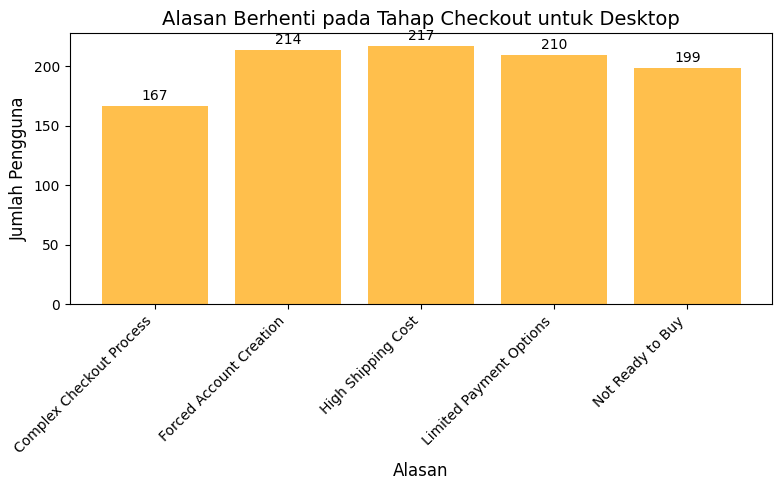

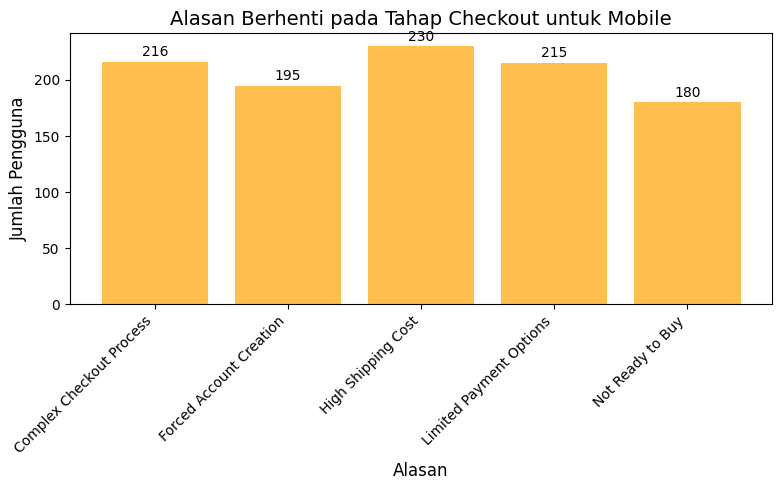

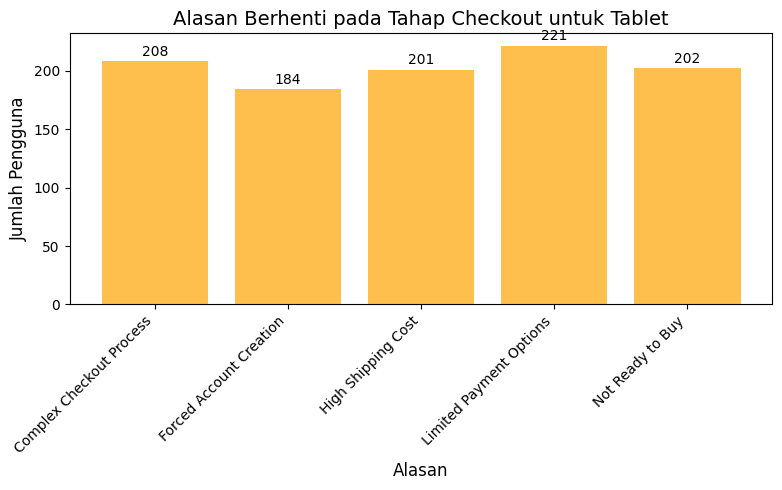

In [28]:
# Membuat diagram batang untuk alasan berhenti pada tahap checkout untuk setiap perangkat
for device in checkout_reasons_by_device.columns:
    reasons = checkout_reasons_by_device.index
    values = checkout_reasons_by_device[device]

    plt.figure(figsize=(8, 5))
    plt.bar(reasons, values, alpha=0.7, color='orange')
    plt.title(f'Alasan Berhenti pada Tahap Checkout untuk {device}', fontsize=14)
    plt.xlabel('Alasan', fontsize=12)
    plt.ylabel('Jumlah Pengguna', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()

    # Beri anotasi nilai pada batang
    for i, value in enumerate(values):
        plt.text(i, value + 5, f'{value:,}', ha='center', fontsize=10)

    plt.show()




---



**Desktop**
1. High Shipping Cost (217 pengguna): Menjadi alasan utama untuk pengguna Desktop.
2. Limited Payment Options (210 pengguna): Hampir setara dengan "High Shipping Cost", menunjukkan kurangnya fleksibilitas metode pembayaran.
3. Forced Account Creation (214 pengguna): Banyak pengguna yang enggan membuat akun untuk melanjutkan proses checkout.
4. Complex Checkout Process (167 pengguna): Menunjukkan bahwa proses checkout yang rumit menjadi penghalang.
5. Not Ready to Buy (199 pengguna): Sebagian pengguna tidak siap untuk melanjutkan pembelian.

**Insight:** Biaya pengiriman tinggi dan keterbatasan metode pembayaran adalah tantangan utama untuk pengguna Desktop.




---



**Mobile**
1. High Shipping Cost (230 pengguna): Alasan paling sering disebutkan oleh pengguna Mobile.
2. Limited Payment Options (215 pengguna): Menempati posisi kedua, menegaskan pentingnya metode pembayaran yang bervariasi untuk pengguna Mobile.
3. Forced Account Creation (195 pengguna): Masih signifikan tetapi lebih rendah dibandingkan Desktop.
4. Complex Checkout Process (216 pengguna): Alasan penting lainnya, menunjukkan perlunya penyederhanaan proses checkout di perangkat Mobile.
5. Not Ready to Buy (180 pengguna): Jumlah pengguna yang cukup banyak tidak siap melanjutkan ke pembelian.

**Insight:** Pengguna Mobile paling terpengaruh oleh biaya pengiriman tinggi dan proses checkout yang rumit.




---



**Tablet**
1. High Shipping Cost (201 pengguna): Masih menjadi alasan utama bagi pengguna Tablet, tetapi sedikit lebih rendah dibandingkan Desktop dan Mobile.
2. Limited Payment Options (221 pengguna): Alasan paling signifikan untuk pengguna Tablet, lebih tinggi dibandingkan perangkat lainnya.
3. Forced Account Creation (184 pengguna): Lebih rendah dibandingkan Desktop dan Mobile.
4. Complex Checkout Process (208 pengguna): Penyederhanaan proses checkout juga diperlukan untuk Tablet.
5. Not Ready to Buy (202 pengguna): Persentase pengguna yang tidak siap membeli cukup tinggi pada perangkat ini.

**Insight:** Tablet menunjukkan pola yang sedikit berbeda, dengan "Limited Payment Options" menjadi perhatian utama.




---



**4. Apakah terdapat perbedaan perilaku berdasarkan perangkat yang digunakan?**

**Tablet**

Perilaku:
1. Tablet memiliki tingkat konversi yang lebih baik dibandingkan perangkat lain di setiap tahap funnel.
2. Pengguna Tablet cenderung lebih terpengaruh oleh pilihan pembayaran yang terbatas, yang menjadi alasan utama dropout.
3. Meskipun pengguna Tablet memiliki jumlah total yang lebih kecil, mereka lebih konsisten melanjutkan ke tahap berikutnya.

**Interpretasi:** Pengguna Tablet sering kali dianggap sebagai pengguna yang lebih "terlibat" atau "intensional" dalam berbelanja online, tetapi mereka membutuhkan fleksibilitas dalam opsi pembayaran.




---



**Desktop**

Perilaku:
1. Pengguna Desktop menunjukkan tingkat dropout yang signifikan di tahap checkout dan pembelian akhir.
2. Alasan utama dropout adalah biaya pengiriman yang tinggi, pembuatan akun paksa, dan proses checkout yang rumit.
3. Desktop memiliki jumlah pengguna yang lebih besar, tetapi proporsi yang menyelesaikan funnel lebih kecil dibandingkan Tablet.

**Interpretasi:** Pengguna Desktop mungkin lebih sensitif terhadap hambatan seperti biaya pengiriman dan kerumitan checkout. Mereka cenderung meninggalkan funnel jika prosesnya tidak efisien.




---



**Mobile**

Perilaku:
1. Pengguna Mobile memiliki tingkat dropout tertinggi, terutama di tahap checkout dan pembelian.
2. Alasan utama dropout adalah biaya pengiriman tinggi, diikuti oleh proses checkout yang rumit.
3. Mobile memiliki potensi besar karena jumlah pengguna yang tinggi, tetapi pengalaman pengguna yang buruk dapat memengaruhi konversi.

**Interpretasi:** Pengguna Mobile sering dipengaruhi oleh desain halaman yang kurang optimal dan proses checkout yang tidak ramah pengguna.


Perbedaan Utama
**bold text**

Sensitivitas pada Hambatan:
1. Desktop dan Mobile lebih sensitif terhadap biaya pengiriman dan kerumitan checkout.
2. Tablet lebih dipengaruhi oleh keterbatasan opsi pembayaran.

Tingkat Konversi:
1. Tablet memiliki tingkat konversi yang lebih tinggi dibandingkan Desktop dan Mobile.
2. Mobile memiliki tingkat konversi terendah meskipun jumlah pengguna yang tinggi.

Prioritas Pengalaman:
1. Mobile memerlukan pengalaman yang lebih sederhana dan responsif.
2. Desktop dapat memanfaatkan fitur tambahan (seperti promosi untuk menutupi biaya pengiriman).




---



**Step 05 : Business Implications**

Strategic Implications:

1. Tingginya tingkat pengabaian keranjang belanja, terutama di tahap checkout, menunjukkan peluang besar yang terlewatkan untuk meningkatkan pendapatan dari pelanggan yang sudah menunjukkan niat membeli.
2. Perusahaan menghadapi risiko kehilangan pelanggan potensial di perangkat tertentu (Desktop dan Mobile) jika hambatan seperti biaya pengiriman tinggi dan proses checkout rumit tidak segera ditangani.

Operational Implications:

1. Proses checkout yang kompleks dan keharusan membuat akun menunjukkan perlunya penyederhanaan proses operasional pada sistem e-commerce.
2. Kurangnya fleksibilitas metode pembayaran terutama untuk pengguna Tablet menunjukkan kebutuhan untuk memperluas opsi pembayaran.

Financial Implications:

1. Pengabaian keranjang belanja menyebabkan pendapatan tidak optimal, dan upaya pemasaran untuk pelanggan baru menjadi kurang efisien dibandingkan dengan mengonversi pelanggan yang sudah menambahkan produk ke keranjang.
2. Biaya pengiriman tinggi menjadi salah satu alasan utama, sehingga promosi seperti diskon atau pengiriman gratis dapat memiliki dampak finansial langsung pada konversi.




---



**Step 06 : Recommendations**

Optimize Checkout Process:

1. Kurangi langkah yang tidak diperlukan pada checkout, seperti membuat opsi untuk checkout sebagai tamu dan menyederhanakan alur halaman checkout.
2. Implementasikan panduan visual di perangkat Mobile untuk membantu pengguna memahami langkah-langkah checkout dengan lebih baik.

Address High Shipping Costs:

1. Tawarkan diskon untuk biaya pengiriman atau sediakan opsi pengiriman gratis untuk pembelian dengan nilai tertentu.
2. Berikan transparansi sejak awal terkait biaya pengiriman untuk mengurangi kejutan harga di tahap akhir.

Expand Payment Options:

1. Tambahkan metode pembayaran baru yang populer di wilayah pasar utama, terutama untuk pengguna Tablet.
2. Promosikan opsi pembayaran yang lebih fleksibel seperti cicilan atau dompet digital untuk meningkatkan kenyamanan pengguna.

Enhance Mobile Experience:

1. Perbaiki desain responsif untuk perangkat Mobile, termasuk meminimalkan waktu loading halaman dan mempermudah navigasi.
2. Tingkatkan kecepatan checkout dengan integrasi alat pembayaran cepat (misalnya, Apple Pay, Google Pay).

Leverage Data-Driven Campaigns:

1. Gunakan data perilaku pengguna untuk mengirimkan email pengingat otomatis kepada pengguna yang meninggalkan keranjang.
2. Berikan penawaran khusus atau diskon waktu terbatas untuk mendorong pengguna yang berhenti di tahap checkout.

Focus on Tablet Potential:

1. Kembangkan pengalaman pengguna untuk Tablet karena perangkat ini memiliki tingkat konversi terbaik.
2. Gunakan iklan yang menargetkan pengguna Tablet dengan menyoroti fleksibilitas pembayaran dan pengalaman checkout yang mulus.

